In [64]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, r2_score

In [2]:
df = pd.read_csv("../Dataset/diabetes.csv")

In [28]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [29]:
x = df.drop(columns="Outcome")
y = df["Outcome"]

In [42]:
lr = LogisticRegression(max_iter=1000)

train_x, test_x, train_y, test_y = train_test_split(x, y, train_size=0.3)

In [43]:
lr.fit(train_x, train_y)

LogisticRegression(max_iter=1000)

In [44]:
y_predit = lr.predict(test_x)

In [45]:
accuracy_score(test_y, y_predit)

0.775092936802974

In [80]:
samples = []
for sample_size in range(50,750, 50):
    train_x, _ = train_test_split(df, train_size=sample_size)
    samples.append(train_x)

def regSummary(y_true, y_pred, sample):
    return{
        "acc_score": accuracy_score(y_true, y_pred),
        "Sample Size": len(sample)
}


In [103]:
test_error = []
train_error = []
for sample in samples:
    data_x = sample.drop(columns=["Outcome"])
    data_y = sample["Outcome"]

    train_x, test_x, train_y, test_y = train_test_split(data_x, data_y, test_size=0.2)
    ls = LogisticRegression(max_iter=1000, tol=0.0001, C=2.0)
    ls.fit(train_x, train_y)

    test_predict = ls.predict(test_x)
    train_predict = ls.predict(train_x)
    
    n1 = regSummary(test_y, test_predict, sample)
    n2 = regSummary(train_y, train_predict, sample)
    test_error.append(n1)
    train_error.append(n2)

In [104]:
test_error_df = pd.DataFrame(test_error)
train_error_df = pd.DataFrame(train_error)

In [105]:
def plot_line(x,y, x_label, y_label, axes, label):
    axes.plot(x,y, label=label)
    axes.set_xlabel(x_label)
    axes.set_ylabel(y_label)
    axes.set_title(f"{x_label} v/s {y_label}")
    axes.legend()

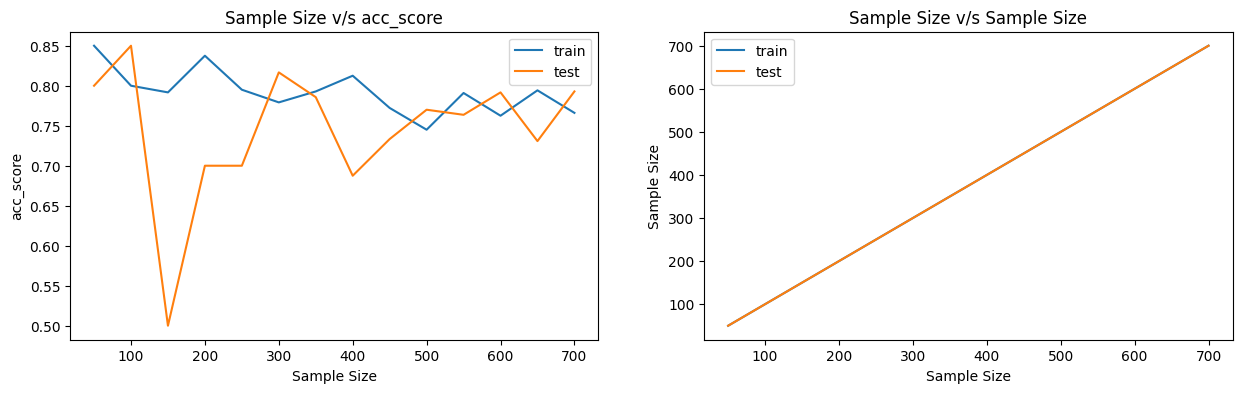

In [106]:
fig, axes = plt.subplots(figsize=(15,4), nrows=1, ncols=2)
axes = axes.flatten()
column = train_error_df.columns

for ax, col in zip(axes, column):
    plot_line(train_error_df["Sample Size"], train_error_df[col], x_label="Sample Size", y_label=col, axes=ax, label="train")
    plot_line(test_error_df["Sample Size"], test_error_df[col], x_label="Sample Size", y_label=col, axes=ax, label="test")

In [107]:
train_error_df

,acc_score,Sample Size
0,0.850000,50
1,0.800000,100
2,0.791667,150
3,0.837500,200
4,0.795000,250
5,0.779167,300
6,0.792857,350
7,0.812500,400
8,0.772222,450
9,0.745000,500
